In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#이미지 로드
> cv2.imread
> * IMREAD_GRAYSCALE : 회색톤으로 읽어들이기
> * IMREAD_COLOR : 컬러로 읽어들이기

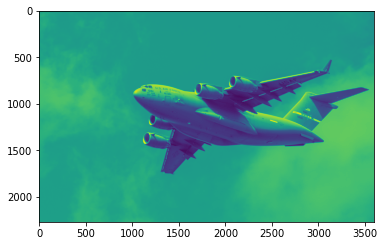

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Datasets/plane.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(2270, 3600)

In [ ]:
img

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

#### IMREAD_COLOR는 RGB가 아닌 BGR로 읽음
> cvtColor와 cv2.COLOR_BGR2RGB 로 RGB버전으로 바꿔주기

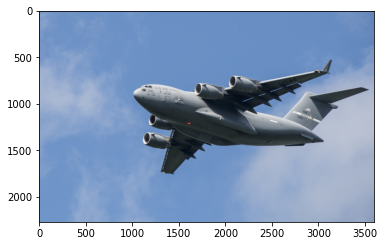

In [ ]:
img_bgr = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Datasets/plane.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

#### 이미지 저장

In [ ]:
cv2.imwrite('/content/sample_data/IMage.jpg', img)

True

# 이미지 크기 변경
> cv2.resize

Text(0.5, 1.0, 'Resize Image')

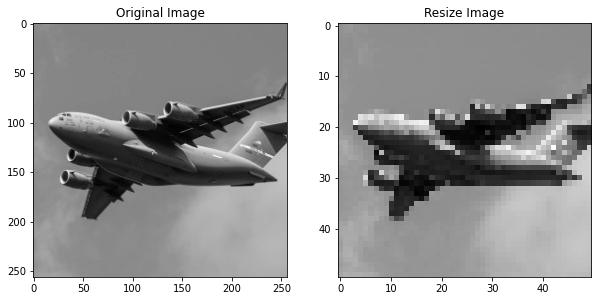

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Datasets/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)
image_50x50 = cv2.resize(image, (50,50))

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(image, cmap = 'gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_50x50, cmap='gray')
ax[1].set_title('Resize Image')

# 이미지 자르기
> 배열 슬라이싱

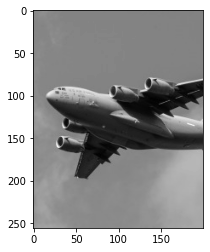

In [ ]:
imge_cropped =image[:,:200]

plt.imshow(imge_cropped, cmap = 'gray')
plt.show()

# 이미지 블러 처리
> cv2.blur
> * kernel 숫자가 커질수록 흐려짐

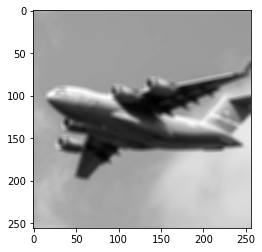

In [ ]:
img_blurry = cv2.blur(image, (6,6))

plt.imshow(img_blurry, cmap = 'gray')
plt.show()

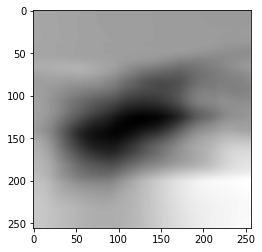

In [ ]:
img_blurry2 = cv2.blur(image, (75,75))

plt.imshow(img_blurry2, cmap = 'gray')
plt.show()

#### 커널을 직접 정의한 후 cv2.filter2D를 통해 이미지에 적용 가능
> 생성된 커널을 적용 시 중앙 원소가 변환되는 픽셀이며, 나머지는 그 픽셀의 이웃이 됨

In [ ]:
kernel = np.ones((10,10)) / 25.0
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]])

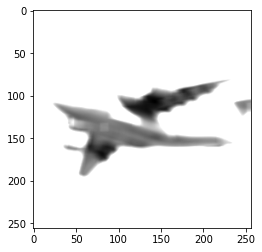

In [ ]:
img_kernel = cv2.filter2D(image, -1, kernel)

plt.imshow(img_kernel, cmap = 'gray')
plt.show()

### 가우시안 블러 _ GaussianBlur
> cv2.GaussianBlur
* 3번째 매개변수는 X축 방향의 표준편차 (0으로 지정시 특정 공식에 따름)

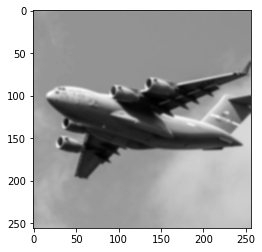

In [ ]:
img_very_blur = cv2.GaussianBlur(image, (5,5), 0)

plt.imshow(img_very_blur, cmap = 'gray')
plt.show()

# 이미지 선명하게 표현
> 대상 픽셀을 강조하는 kernel 정의 후 cv2.filter2D 적용

Text(0.5, 1.0, 'Sharp Image')

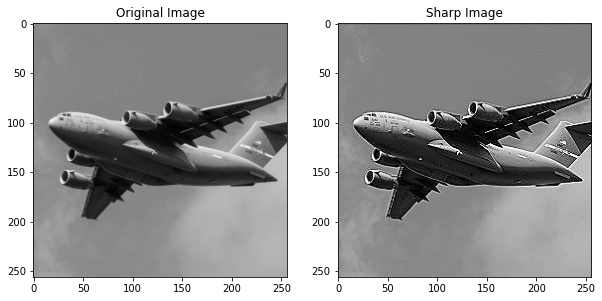

In [ ]:
kernel2 = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

img_sharp = cv2.filter2D(image, -1, kernel2)

fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].imshow(image, cmap = 'gray')
ax[0].set_title('Original Image')
ax[1].imshow(img_sharp, cmap='gray')
ax[1].set_title('Sharp Image')

# 이미지 대비 높이기
> cv2.equalizeHist

Text(0.5, 1.0, 'Enhanced Image')

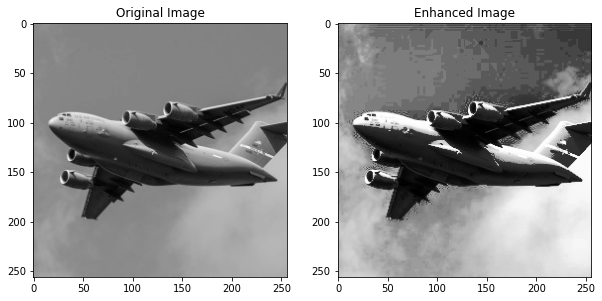

In [ ]:
img_enhanced = cv2.equalizeHist(image)

fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].imshow(image, cmap = 'gray')
ax[0].set_title('Original Image')
ax[1].imshow(img_enhanced, cmap='gray')
ax[1].set_title('Enhanced Image')

### 컬러 이미지는 YUV 컬러 포맷으로 전환 후 cv2.equalizeHist 적용
> cv2.COLOR_BGR2YUV

> cv2.COLOR_YUV2RGB
* Y: 밝기  U,V : 컬러

Text(0.5, 1.0, 'Enhanced Color Image')

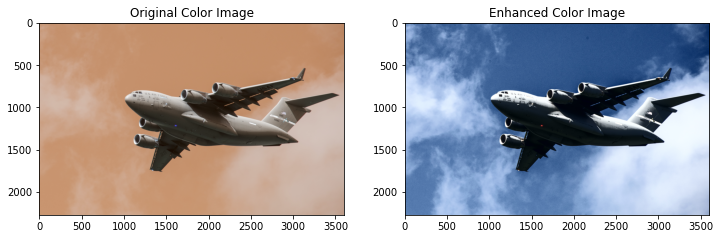

In [ ]:
img_yuv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV)

img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

img_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

fig, ax = plt.subplots(1, 2, figsize = (12,8))
ax[0].imshow(img_bgr, cmap = 'gray')
ax[0].set_title('Original Color Image')
ax[1].imshow(img_rgb, cmap='gray')
ax[1].set_title('Enhanced Color Image')

# 이미지 이진화 ( 고오급 : 적응적 이진화 _ Adaptive Thresholding)
> cv2.adaptiveThreshold

In [ ]:
# Adaptive Thresholding 적용

max_output_value = 255 #출력 픽셀 강도의 최댓값
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image, max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

* max_output_value : 출력 픽셀 강도의 최댓값 저장

* cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 픽셀의 임곗값을 주변 픽셀 강도의 가중치 합으로 설정, 가중치는 가우시안 윈도우에 의해 결정

* cv2.THRESH_BINARY : 주변 픽셀의 평균을 임계값으로 설정

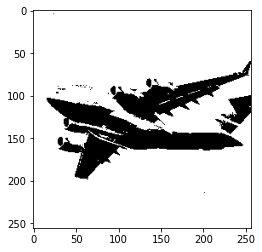

In [ ]:
plt.imshow(image_binarized, cmap = 'gray')
plt.show()

# 배경 제거
> cv2.grabCut
* 제거하지 못한 배경 발생, 
* 수용하셈 그냥 일일이 다 없앨 수는 없어

In [ ]:
#이미지 로드 후 RGB로  변환
img_bgr = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Datasets/plane_256x256.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 사각형 좌표 : 시작점의 x, y , 높이, 너비
rectangle = (0, 56, 256, 150)

#초기 마스크 생성
mask = np.zeros(img_rgb.shape[:2], np.uint8)

#grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

#grabCut 실행
cv2.grabCut(img_rgb,
            mask,
            rectangle,
            bgdModel,
            fgdModel,
            5,
            cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 3.58154888e-01,  8.87617088e-02,  3.07697254e-01,
          1.13518959e-01,  1.31867190e-01,  7.96318152e+01,
          1.42454486e+02,  1.96163325e+02,  1.40773485e+02,
          1.71938179e+02,  2.02640425e+02,  8.75006618e+01,
          1.47160084e+02,  1.98042076e+02,  1.57438822e+02,
          1.80246601e+02,  2.04860838e+02,  1.07784298e+02,
          1.56056079e+02,  1.99441645e+02,  3.09994177e+00,
          1.84301846e+00,  1.62402157e+00,  1.84301846e+00,
          1.54184190e+00,  1.25685013e+00,  1.62402157e+00,
          1.25685013e+00,  1.19260792e+00,  5.27600890e+01,
          2.06015484e+01, -2.68975642e+00,  2.06015484e+01,
          9.12440808e+00, -5.92622844e-01, -2.68975642e+00,
         -5.92622844e-01,  3.30876427e+00,  3.16907519

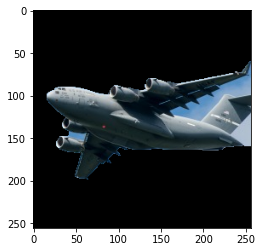

In [ ]:
#배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

#이미지에 새로운 마스크를 곱해서 배경 제외
img_rgb_nobg = img_rgb * mask_2[:, :, np.newaxis]

plt.imshow(img_rgb_nobg)
plt.show()

### 설명
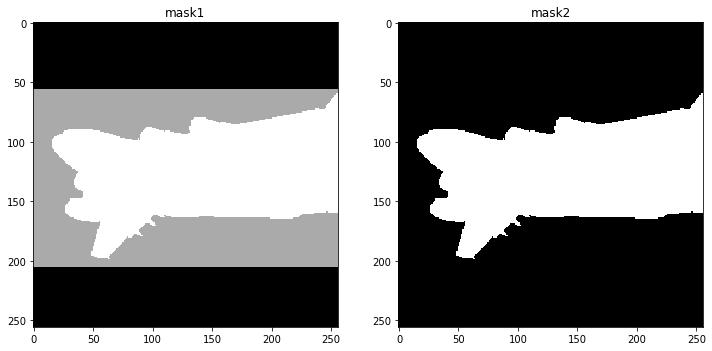

* 왼쪽 그림의 검은 영역은 배경이라고 확실하게 정의한 rectangle의 바깥쪽 영역

* 왼쪽 그림의 회색 영역은 그랩컷이 배경이라고 생각하는 영역

* 오른쪽 그림은 두번째 마스크를 이미지에 적용하여 전경만 남긴 이미지

# 경계선 감지
> cv2.Canny

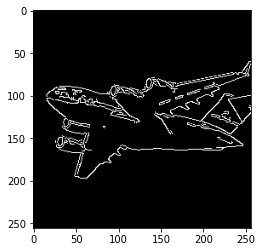

In [ ]:
# 픽셀 강도의 중간값 계산
median_intensity = np.median(image)

# 중간 픽셀 강도에서 위아래 표준편차 1 떨어진 값을 임곗값으로 지정
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(max(255, (1.0 + 0.33) * median_intensity))

# Canny edge detection 적용
img_canny = cv2.Canny(image, lower_threshold, upper_threshold)

plt.imshow(img_canny, cmap = 'gray')
plt.show()